---

## **<font color="Dodgerblue"> Modelación Climática Tropical</font>**
### **<font color="crimson"> Ciclo anual GPCP</font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy import stats

In [6]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=10)

In [7]:
# Archivo de precipitación GPCP
filename='/home/jovyan/ModClim/datos_actualizados/precip.mon.mean.nc'
ds=xr.open_dataset(filename)
pr=ds['precip']
pr

<xarray.DataArray 'precip' (time: 555, lat: 72, lon: 144)> Size: 23MB
[5754240 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2025-03-01
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Attributes:
    long_name:                Average Monthly Rate of Precipitation
    valid_range:              [  0. 100.]
    units:                    mm/day
    precision:                32767
    least_significant_digit:  2
    var_desc:                 Precipitation
    dataset:                  GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:               Surface
    statistic:                Mean
    parent_stat:              Mean
    actual_range:             [ 0.       47.327435]

In [8]:
pr.units

'mm/day'

In [9]:
pr_years = pr.sel(time=slice('1979', '2024'))

In [10]:
jjas = pr_years.where((pr_years.time.dt.month >= 6) & (pr_years.time.dt.month <= 9), drop=True)

In [11]:
mean_jjas = jjas.mean('time')

In [12]:
mean_jjas

<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
array([[0.5653484 , 0.54101014, 0.52246726, ..., 0.57694995, 0.58707666,
        0.59127855],
       [0.39596283, 0.3884928 , 0.36681196, ..., 0.40380958, 0.41079313,
        0.40065014],
       [0.30502588, 0.29501113, 0.26402748, ..., 0.3458111 , 0.35477912,
        0.3379284 ],
       ...,
       [0.7050088 , 0.7141999 , 0.7174045 , ..., 0.7089287 , 0.70398545,
        0.70143557],
       [0.7383701 , 0.7503371 , 0.76125544, ..., 0.74392825, 0.7468126 ,
        0.74703485],
       [0.8334101 , 0.85393447, 0.8437392 , ..., 0.80917567, 0.8251991 ,
        0.82271445]], dtype=float32)
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8

In [13]:
print(mean_jjas.min())
print(mean_jjas.max())

<xarray.DataArray 'precip' ()> Size: 4B
array(0.00122908, dtype=float32)
<xarray.DataArray 'precip' ()> Size: 4B
array(20.493135, dtype=float32)


### **<font color="Steelblue"> Ciclo anual del centro-sur de México.</font>** 

In [14]:
# Asignamos pesos con la función coseno
lats = pr_years.lat
weights = np.cos(np.deg2rad(lats))
weights.name = "weights"

In [15]:
# Aplicamos weights y luego el promedio espacial
pr_weighted = pr_years.weighted(weights)
pr_meanglobal = pr_weighted.mean(dim=['lat', 'lon'])

In [16]:
# 1979-2023 
centrolat=pr_years.sel(lat=slice(13.75,23.75)) 
centrolon=centrolat.sel(lon=slice(253.75,273.5)) 

centro_peso=centrolon.weighted(weights) 
prcentro=centrolon.mean(["lon","lat"]) 

mensual_prcentro = prcentro.groupby(prcentro.time.dt.month).mean() 
#mensual_prcentro.to_netcdf('GPCP_ciclo_actualizado.nc')

In [17]:
meses=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

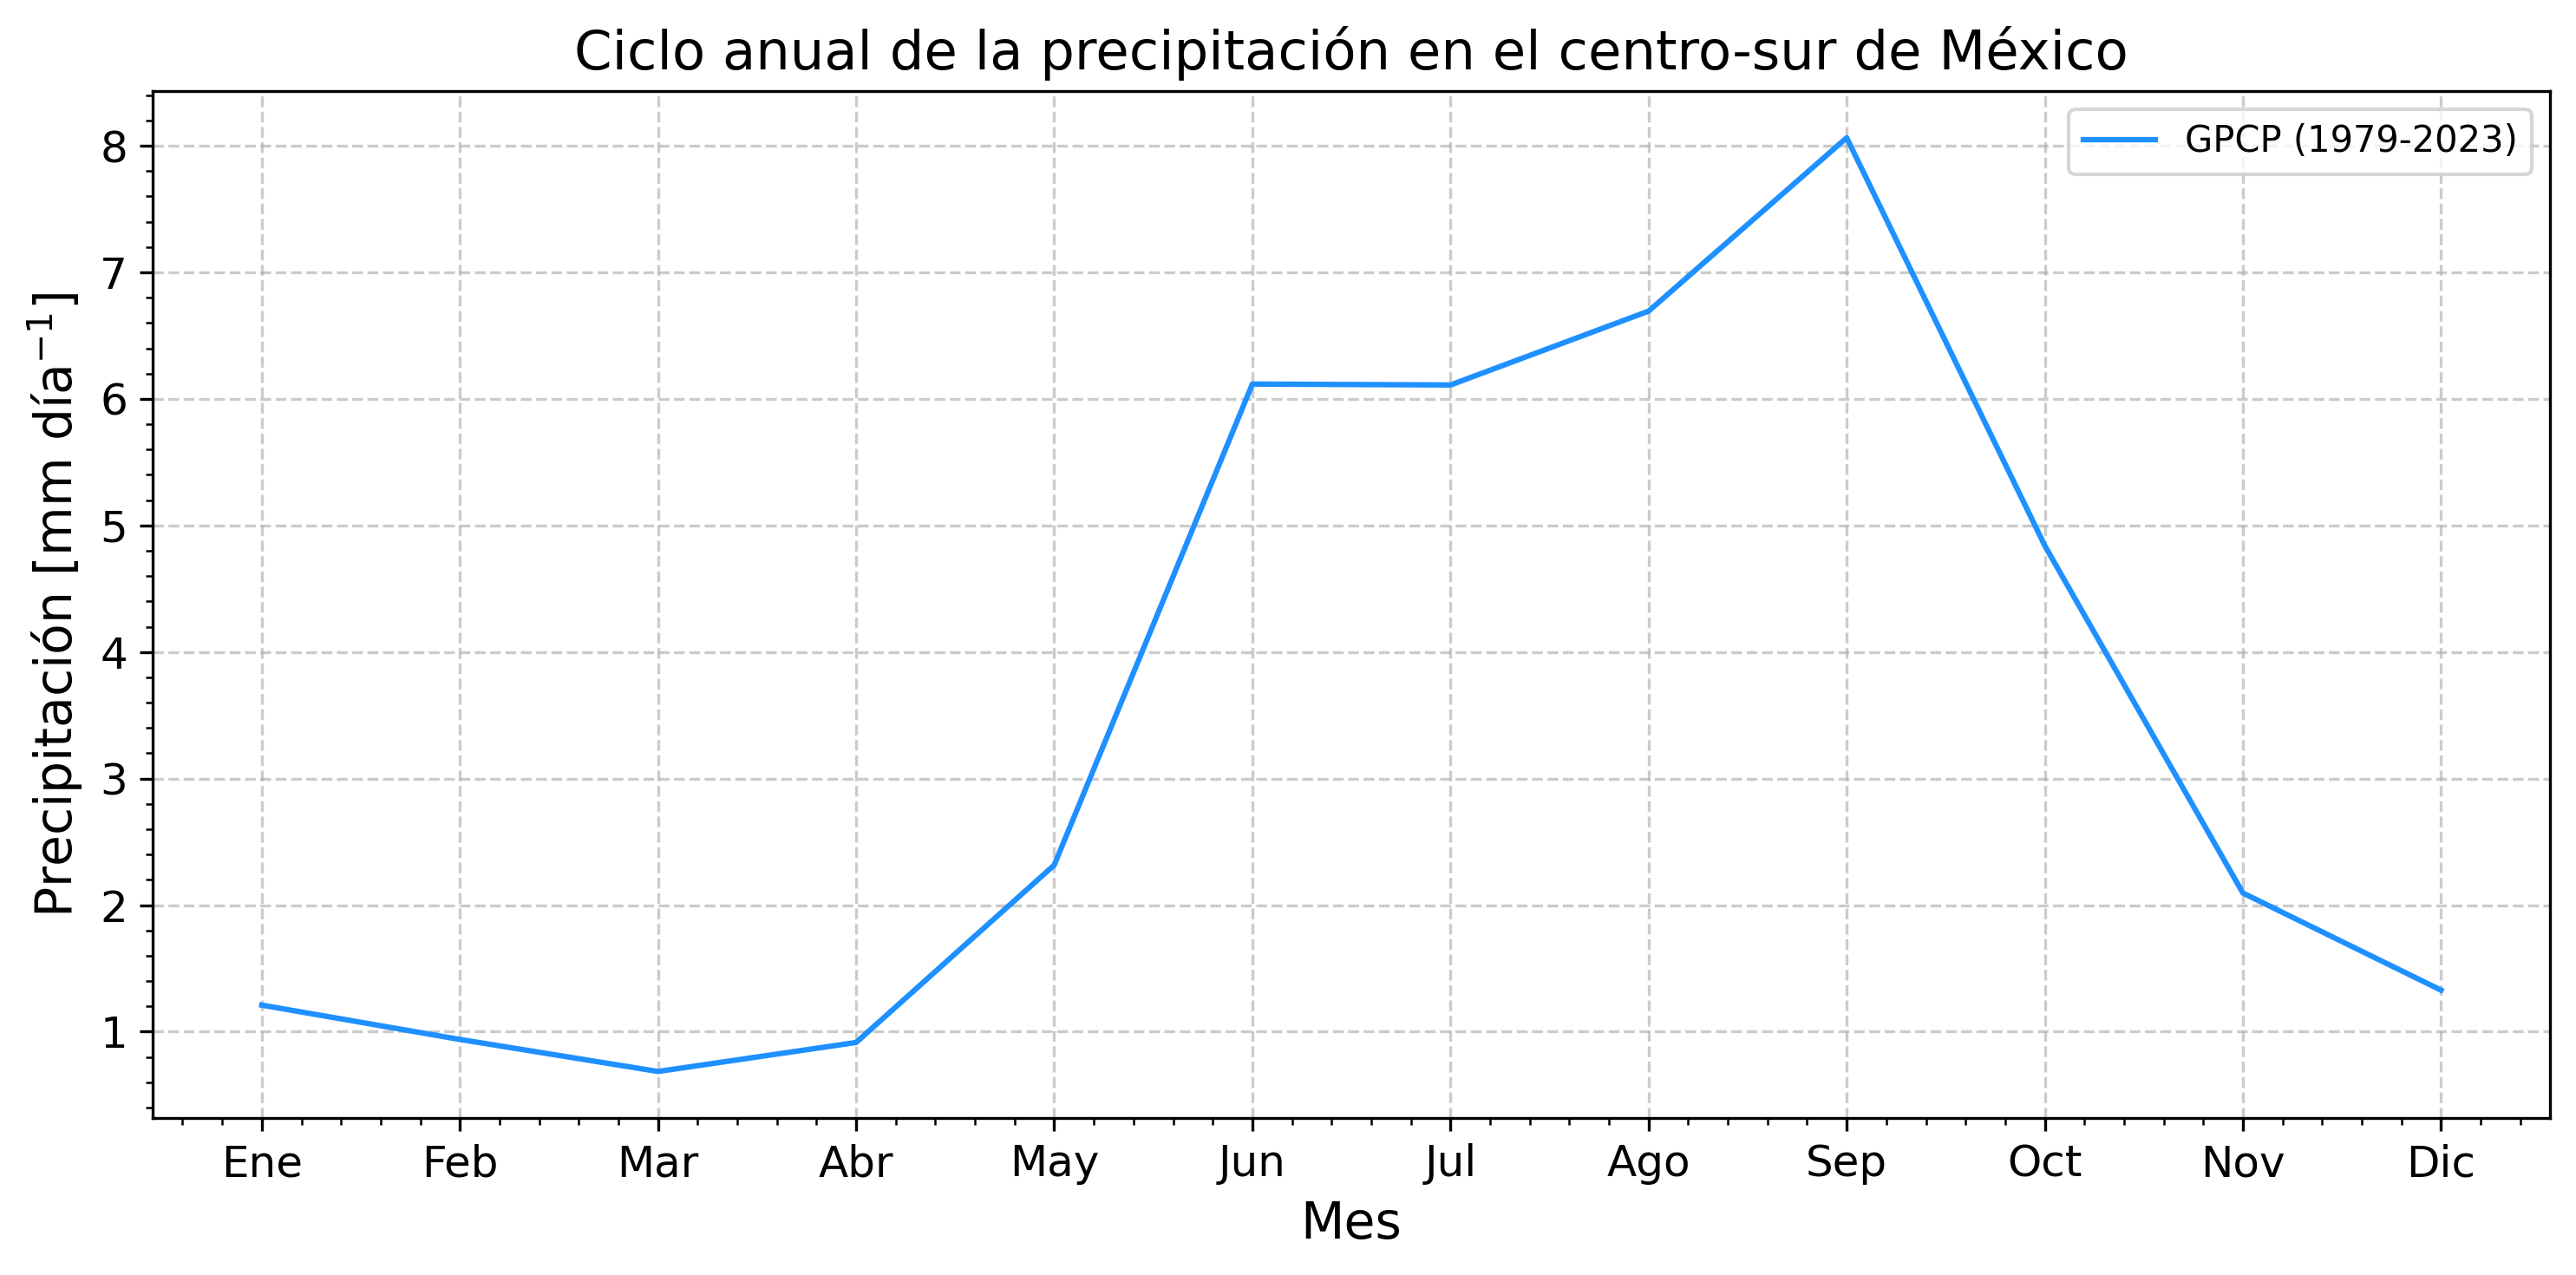

In [18]:
plt.figure(figsize=(10,5), dpi=300)
plt.plot(meses,mensual_prcentro,c='dodgerblue',label='GPCP (1979-2023)') 
lineplot_setup(None,None,'Mes','Precipitación [mm día$^{-1}$]',title='Ciclo anual de la precipitación en el centro-sur de México')
plt.legend()
plt.tight_layout()